In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()

from pandarallel import pandarallel
pandarallel.initialize()

import glob
pd.set_option("display.max_columns", 999)

from pathlib import Path

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from libs import load_data
from libs import infer_sentiment

%load_ext autoreload
%autoreload 2



INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [ ]:
for name, frac in \
    [("ドコモ口座", 1), ("ドコモ", 0.3), 
         ("プリキュア", 0.3), ("けものフレンズ", 0.3), ("東京五輪", 0.5), ("テラスハウス", 1),
         ("ゆうちょ銀行", 1), ("自民党", 1),("公明党", 0.5),("立憲", 0.5),("共産党", 1), ("国民民主", 1), ("中核派", 1), ("山本太郎", 1), ("電通", 1), ("コロワイド", 1)]:
    if Path(f"../var/{name}.csv").exists():
        continue
    print(name)
    df = load_data.load_data(f"../util/{name}/*")
    infer_sentiment.infer_sentiment(df, filename=name, frac=frac)

立憲


100%|██████████| 111582/111582 [59:21<00:00, 31.33it/s] 


共産党


 65%|██████▍   | 162086/250540 [1:36:51<1:12:13, 20.41it/s]

In [ ]:
tmp = pd.read_csv("_nikai_tmp.csv",  error_bad_lines=False,lineterminator='\n')
tmp["year_month"] = pd.to_datetime(tmp.date, errors="coerce").dt.strftime("%Y-%m")
a = tmp.groupby(by=["date"]).agg(mean_score=("score", "mean"), sample_num=("score", "count")).reset_index()
a["rolling_score"] = a.mean_score.rolling(28, win_type=None).mean()
# ---
sns.set_context("poster")
plt.figure(figsize=(25, 25))

ax = sns.lineplot(data=a, x="date", y="rolling_score_nikai", label="二階幹事長")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set(ylim=(0, 0.5))

        
for idx, lbl in enumerate(ax.get_xticklabels()):
    if idx%28 == 0:
        lbl.set_visible(True)
    else:
        lbl.set_visible(False)
        
plt.show()

In [41]:
tmp = pd.read_csv("_nikai_tmp.csv",  error_bad_lines=False,lineterminator='\n')
#tmp["score"] = tmp.score // 0.05 * 0.05

tmp["year_month"] = pd.to_datetime(tmp.date, errors="coerce").dt.strftime("%Y-%m")
a = tmp.groupby(by=["date"]).agg(mean_score=("score", "mean"), sample_num=("score", "count")).reset_index()
a["rolling_score"] = a.mean_score.rolling(28, win_type=None).mean()

tmp = pd.read_csv("_o_tmp.csv",  error_bad_lines=False,lineterminator='\n')

tmp["year_month"] = pd.to_datetime(tmp.date, errors="coerce").dt.strftime("%Y-%m")
b = tmp.groupby(by=["date"]).agg(mean_score=("score", "mean"), sample_num=("score", "count")).reset_index()
b["rolling_score"] = b.mean_score.rolling(28, win_type=None).mean()

In [56]:
c = pd.merge(b, a, how="left", on=["date"], suffixes=["_o", "_nikai"])
c

,date,mean_score_o,sample_num_o,rolling_score_o,mean_score_nikai,sample_num_nikai,rolling_score_nikai
0,2016-08-27,0.374645,1,NaN,0.211118,27.0,0.196261
1,2016-09-01,0.185149,1,NaN,0.172548,11.0,0.191748
2,2016-11-02,0.476232,1,NaN,0.092911,12.0,0.175073
3,2018-08-18,0.015832,1,NaN,NaN,NaN,NaN
4,2018-10-13,0.396277,1,NaN,0.045952,5.0,0.197895
...,...,...,...,...,...,...,...
395,2021-01-28,0.343783,35,0.324674,0.151689,169.0,0.149871
396,2021-01-29,0.363271,64,0.325985,0.171279,126.0,0.151631
397,2021-01-30,0.370772,21,0.326509,0.107518,150.0,0.150620
398,2021-01-31,0.336652,177,0.325833,0.160813,76.0,0.151687


In [42]:
import japanize_matplotlib

<ipython-input-60-94322f6b5471>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-60-94322f6b5471>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
<ipython-input-60-94322f6b5471>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
<ipython-input-60-94322f6b5471>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax.get_xticklabels(), fontsize=12)
<ipython-input-60-94322f6b5471>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(c.date)


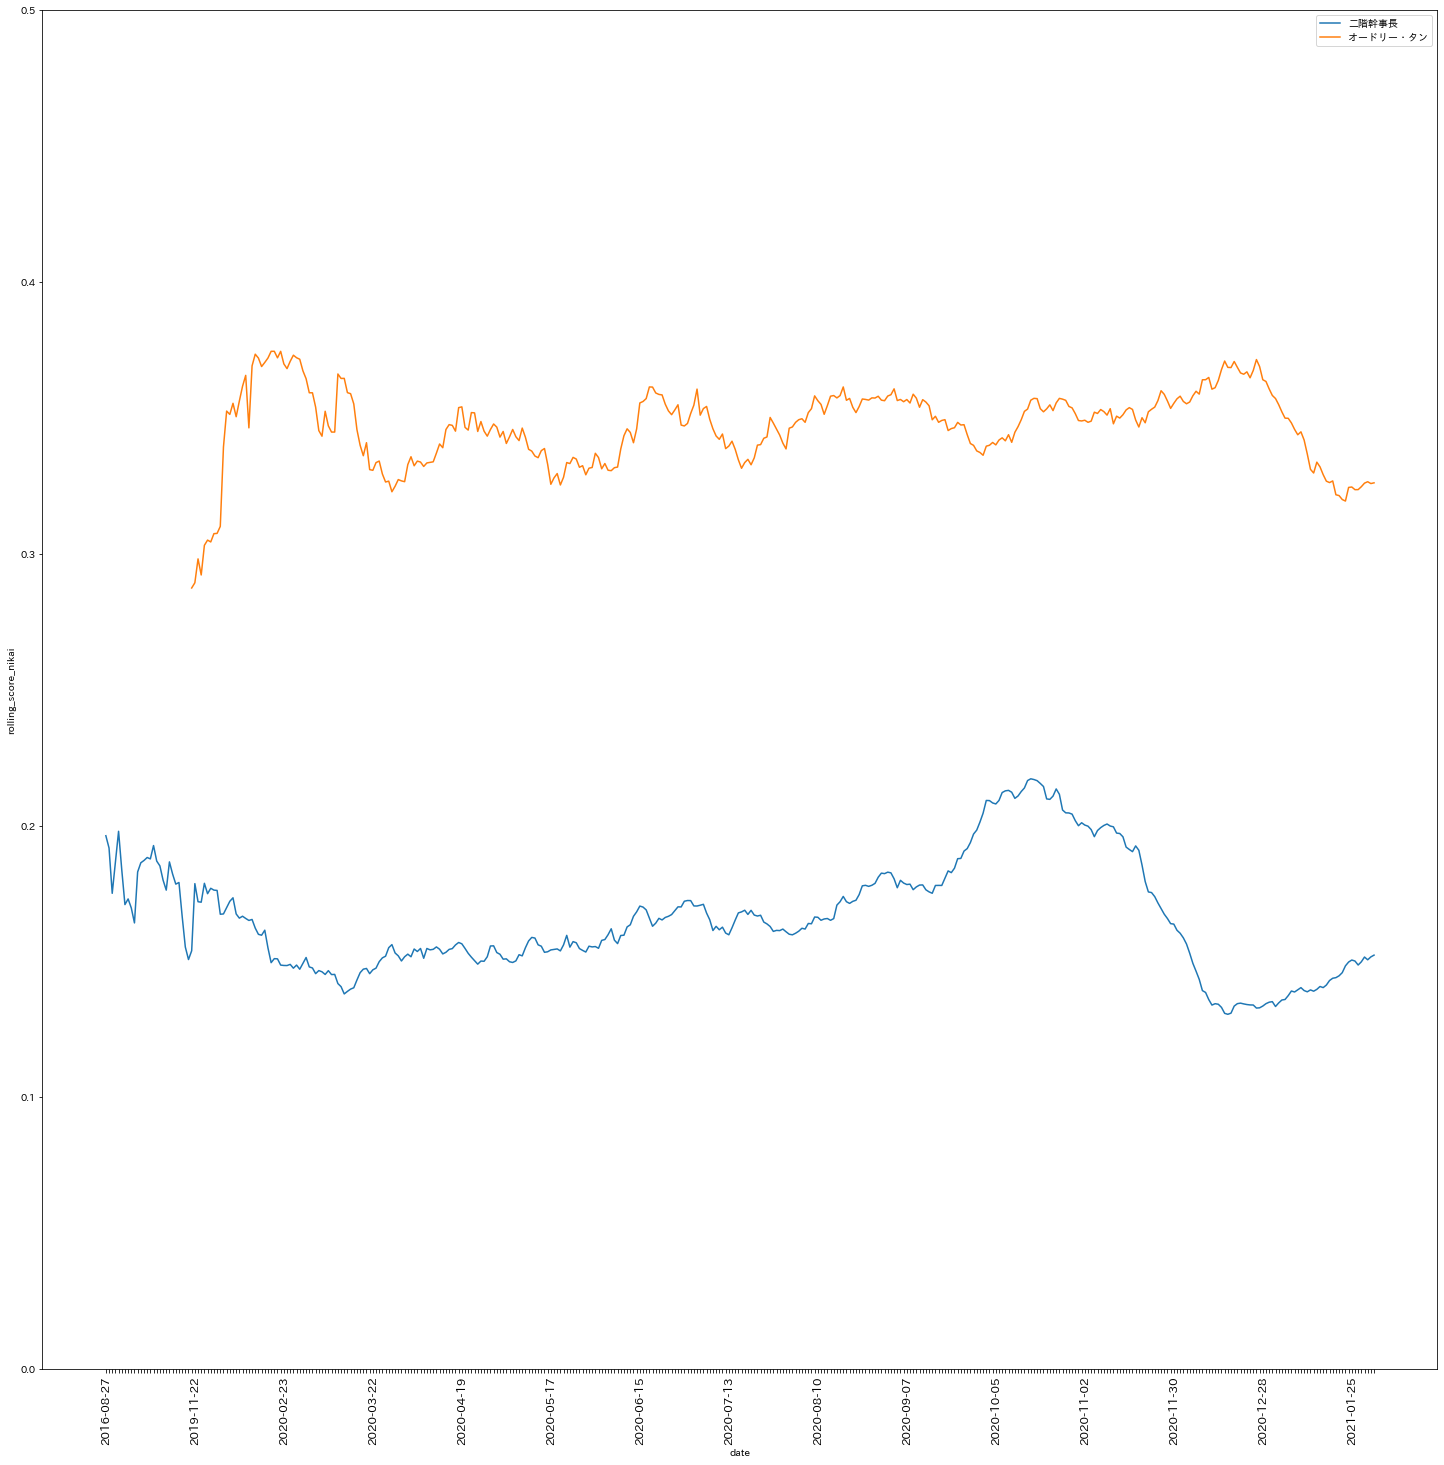

In [60]:
plt.figure(figsize=(25, 25))

ax = sns.lineplot(data=c, x="date", y="rolling_score_nikai", label="二階幹事長")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set(ylim=(0, 0.5))
#for idx, lbl in enumerate(ax.get_xticklabels()):
#    if idx%28 == 0:
#        lbl.set_visible(True)
#    else:
#        lbl.set_visible(False)
        
ax1 = sns.lineplot(data=c, x="date", y="rolling_score_o", label="オードリー・タン")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax1.set(ylim=(0, 0.5))

ax1.set_xticklabels(c.date)
for idx, lbl in enumerate(ax1.get_xticklabels()):
    if idx%28 == 0:
        lbl.set_visible(True)
    else:
        lbl.set_visible(False)
        
plt.show()